In [324]:
import nltk
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from pylab import rcParams
import re

In [325]:
html=requests.get("https://en.wikipedia.org/wiki/Ruby").text
soup=BeautifulSoup(html,"html.parser")

In [326]:
for script in soup(["script", "style"]):
    script.decompose()
#テキストのみ取り出す
text=soup.get_text()
print(text)





Ruby - Wikipedia































Ruby

From Wikipedia, the free encyclopedia


Jump to navigation
Jump to search
This article is about the mineral or gem. For other uses, see Ruby (disambiguation).
RubyNatural ruby crystals from Winza, TanzaniaGeneralCategoryOxide mineral varietyFormula(repeating unit)aluminium oxide with chromium, Al2O3:CrCrystal systemTrigonalCrystal classHexagonal scalenohedral (3m) H-M symbol: (3 2/m)Space groupR3c[1]IdentificationColorNear colorless through pink through all shades of red to a deep crimsonCrystal habitTerminated tabular hexagonal prismsCleavageNo true cleavageFractureConchoidal, splinteryTenacityBrittleMohs scale hardness9.0LusterSubadamantine, vitreous, pearly (on partings)StreakWhiteDiaphaneityTransparent, translucentSpecific gravity3.97 – 4.05Optical propertiesUniaxial -Refractive indexnω=1.768–1.772 nε=1.760–1.763Birefringence0.008PleochroismStrong: purplish-red – orangy-redDispersion0.018Ultraviolet fluorescenceRed under lon

In [327]:
lines= [line.strip() for line in text.splitlines()]

In [328]:
#数値は無視する。
text = re.sub(r'\d+', '', text)
#4文字以上の単語が対象
text = re.sub(r'\b\w{1,3}\b', '', text)
text = re.sub(r'^-\w+', '', text)

In [329]:
#tokens = nltk.word_tokenize(text)
#tokens = nltk.word_tokenize(nonNumberText)
tokens = nltk.word_tokenize(text)


In [330]:
text = nltk.Text(tokens)


In [331]:
type(tokens)

list

In [332]:
tokens_l = [w.lower() for w in tokens]
len(set(tokens_l))

1373

In [333]:
stopwords = nltk.corpus.stopwords.words('english')
symbols = ["'", "''", '"', '`','``', '.','..','...', ',', '-', '–','−', '!', '?', ':', ';', '(', ')', '[', ']','’','’','$','“','”','>','<','#','@','{','}','\\','\\\\','/','//','_','=','==','+','++','-','--','*','|','||','~','^','&','%','--','°']
short = ["'m","'re","'t","'s","n't","'d","'ll","'ve"]

In [334]:
stGSL = open("stopGSL.txt", "r")
list_GSL=stGSL.read().splitlines()

In [335]:
fdist = nltk.FreqDist(w.lower() for w in text if w.lower() not in stopwords + symbols + list_GSL + short)

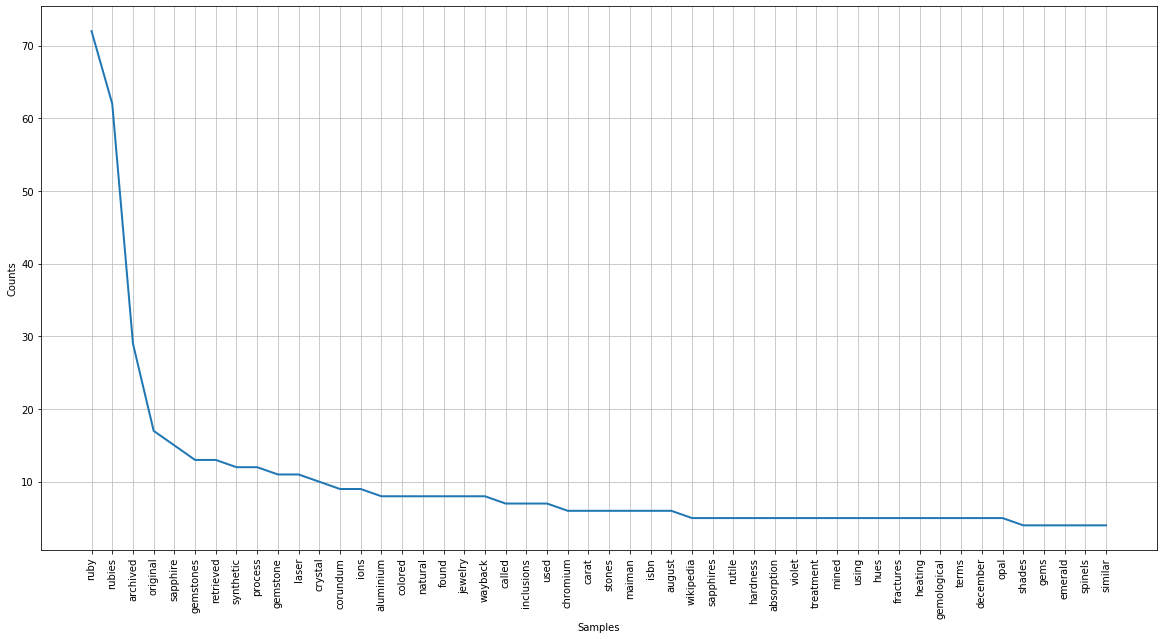

In [336]:
rcParams['figure.figsize'] = 20,10
fdist.plot(50)

In [337]:
fdist.most_common(500)

[('ruby', 72),
 ('rubies', 62),
 ('archived', 29),
 ('original', 17),
 ('sapphire', 15),
 ('gemstones', 13),
 ('retrieved', 13),
 ('synthetic', 12),
 ('process', 12),
 ('gemstone', 11),
 ('laser', 11),
 ('crystal', 10),
 ('corundum', 9),
 ('ions', 9),
 ('aluminium', 8),
 ('colored', 8),
 ('natural', 8),
 ('found', 8),
 ('jewelry', 8),
 ('wayback', 8),
 ('called', 7),
 ('inclusions', 7),
 ('used', 7),
 ('chromium', 6),
 ('carat', 6),
 ('stones', 6),
 ('maiman', 6),
 ('isbn', 6),
 ('august', 6),
 ('wikipedia', 5),
 ('sapphires', 5),
 ('rutile', 5),
 ('hardness', 5),
 ('absorption', 5),
 ('violet', 5),
 ('treatment', 5),
 ('mined', 5),
 ('using', 5),
 ('hues', 5),
 ('fractures', 5),
 ('heating', 5),
 ('gemological', 5),
 ('terms', 5),
 ('december', 5),
 ('opal', 5),
 ('shades', 4),
 ('gems', 4),
 ('emerald', 4),
 ('spinels', 4),
 ('similar', 4),
 ('treatments', 4),
 ('references', 4),
 ('links', 4),
 ('yellow-green', 4),
 ('optical', 4),
 ('imperfections', 4),
 ('including', 4),
 ('heated

In [338]:
text.concordance('how', lines=5)

no matches


In [322]:
fdist.most_common(500)

[('ruby', 72),
 ('rubies', 62),
 ('archived', 29),
 ('original', 17),
 ('sapphire', 15),
 ('gemstones', 13),
 ('retrieved', 13),
 ('gemstone', 12),
 ('synthetic', 12),
 ('process', 12),
 ('laser', 11),
 ('crystal', 10),
 ('corundum', 9),
 ('ions', 9),
 ('jewelry', 9),
 ('aluminium', 8),
 ('colored', 8),
 ('natural', 8),
 ('found', 8),
 ('wayback', 8),
 ('called', 7),
 ('inclusions', 7),
 ('used', 7),
 ('chromium', 6),
 ('stones', 6),
 ('maiman', 6),
 ('isbn', 6),
 ('august', 6),
 ('wikipedia', 5),
 ('sapphires', 5),
 ('carat', 5),
 ('rutile', 5),
 ('hardness', 5),
 ('absorption', 5),
 ('violet', 5),
 ('treatment', 5),
 ('mined', 5),
 ('using', 5),
 ('hues', 5),
 ('fractures', 5),
 ('heating', 5),
 ('gemological', 5),
 ('terms', 5),
 ('december', 5),
 ('opal', 5),
 ('shades', 4),
 ('gems', 4),
 ('emerald', 4),
 ('spinels', 4),
 ('similar', 4),
 ('treatments', 4),
 ('references', 4),
 ('links', 4),
 ('optical', 4),
 ('imperfections', 4),
 ('including', 4),
 ('heated', 4),
 ('spinel', 4),

In [3]:
tokens = nltk.word_tokenize(raw)

In [4]:
text = nltk.Text(tokens)

In [5]:
len(tokens)

14802

In [6]:
tokens_l = [w.lower() for w in tokens]
len(set(tokens_l))

2326

In [7]:
tokens_l.count('rails')

184

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
symbols = ["'", '"', '`', '.', ',', '-', '!', '?', ':', ';', '(', ')','’','’','$','“','”','>','<','#',' @','{','}','\\','/','_','=','+','-','*','|','~','^','&']
short = ["'m","'re","'t","'s","n't","'d","'ll","'ve"]

In [9]:
stGSL = open("stopGSL.txt", "r")
list_GSL=stGSL.read().splitlines()

In [10]:
fdist = nltk.FreqDist(w.lower() for w in text if w.lower() not in stopwords + symbols + list_GSL + short)

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

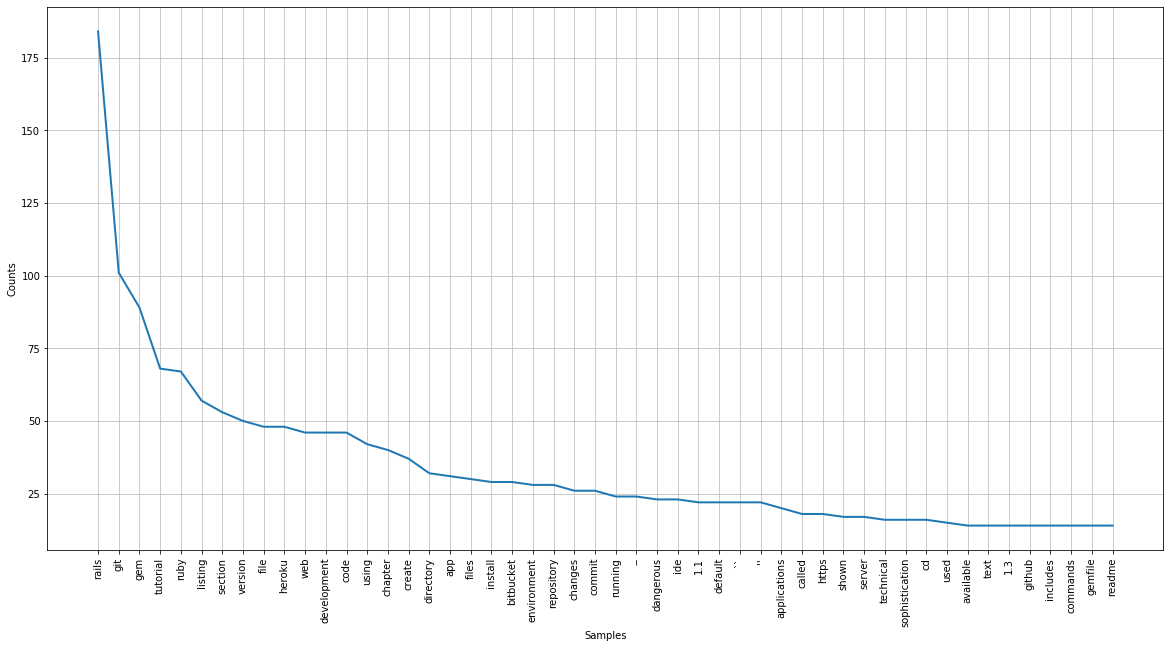

In [14]:
fdist.plot(50)

In [15]:
token_length = len(tokens)
type(token_length)

int

In [16]:
fdist.most_common(50)

[('rails', 184),
 ('git', 101),
 ('gem', 89),
 ('tutorial', 68),
 ('ruby', 67),
 ('listing', 57),
 ('section', 53),
 ('version', 50),
 ('file', 48),
 ('heroku', 48),
 ('web', 46),
 ('development', 46),
 ('code', 46),
 ('using', 42),
 ('chapter', 40),
 ('create', 37),
 ('directory', 32),
 ('app', 31),
 ('files', 30),
 ('install', 29),
 ('bitbucket', 29),
 ('environment', 28),
 ('repository', 28),
 ('changes', 26),
 ('commit', 26),
 ('running', 24),
 ('--', 24),
 ('dangerous', 23),
 ('ide', 23),
 ('1.1', 22),
 ('default', 22),
 ('``', 22),
 ("''", 22),
 ('applications', 20),
 ('called', 18),
 ('https', 18),
 ('shown', 17),
 ('server', 17),
 ('technical', 16),
 ('sophistication', 16),
 ('cd', 16),
 ('used', 15),
 ('available', 14),
 ('text', 14),
 ('1.3', 14),
 ('github', 14),
 ('includes', 14),
 ('commands', 14),
 ('gemfile', 14),
 ('readme', 14)]

In [17]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests

In [27]:
html=requests.get("https://en.wikipedia.org/wiki/Ruby").text
soup=BeautifulSoup(html,"html.parser")

In [28]:
for script in soup(["script", "style"]):
    script.decompose()
text=soup.get_text()

print(text)





Ruby - Wikipedia































Ruby

From Wikipedia, the free encyclopedia


Jump to navigation
Jump to search
This article is about the mineral or gem. For other uses, see Ruby (disambiguation).
RubyNatural ruby crystals from Winza, TanzaniaGeneralCategoryOxide mineral varietyFormula(repeating unit)aluminium oxide with chromium, Al2O3:CrCrystal systemTrigonalCrystal classHexagonal scalenohedral (3m) H-M symbol: (3 2/m)Space groupR3c[1]IdentificationColorNear colorless through pink through all shades of red to a deep crimsonCrystal habitTerminated tabular hexagonal prismsCleavageNo true cleavageFractureConchoidal, splinteryTenacityBrittleMohs scale hardness9.0LusterSubadamantine, vitreous, pearly (on partings)StreakWhiteDiaphaneityTransparent, translucentSpecific gravity3.97 – 4.05Optical propertiesUniaxial -Refractive indexnω=1.768–1.772 nε=1.760–1.763Birefringence0.008PleochroismStrong: purplish-red – orangy-redDispersion0.018Ultraviolet fluorescenceRed under lon